$$f_i(x)=\frac{1}{2}x^T A_i x+b_i^T x+1,\quad A_i\in S_{++}^n \text{ and } b_i^T A_i^{-1}b\leq 2.$$
$$\min f(x)=\frac{1}{2}\sum_{i=1}^m f_i(x)^2$$

In [421]:
import numpy as np
from newton import newton_eq, newton,gradient_descent
import matplotlib.pyplot as plt


In [422]:
m = 20
n = 2

val = lambda b_i, A_i_inv: b_i.T @ A_i_inv @ b_i
f_list = []
f_grad_list = []
A_list = []
b_list = []
for i in range(m):
    A_i = np.random.randn( n,n )
    A_i = A_i.T @ A_i

    # Get the inverse of A_i
    A_i_inv = np.linalg.inv(A_i)
    
    # Get a random vector such that b_i @ A_i_inv @ b_i <=2
    b_i = np.random.random(n)
    b_i = b_i / np.sqrt(val(b_i, A_i_inv)) * np.sqrt(.1)
    # print(val(b_i, A_i_inv))
    
    f_i = lambda x: 1/2 * x.T @ A_i @ x + b_i.T @ x + 1
    f_i_grad = lambda x: A_i @ x + b_i
    f_list.append(f_i)
    f_grad_list.append(f_i_grad)
    A_list.append(A_i)
    b_list.append(b_i)

domf = lambda x: True
f = lambda x: 1/2*sum([f_i(x)**2 for f_i in f_list])
f_grad = lambda x: sum([f_i(x)*f_i_grad(x) for f_i, f_i_grad in zip(f_list, f_grad_list)])

In [423]:
f_hess = lambda x: sum([f_i_grad(x).reshape(-1,1) @ f_i_grad(x).reshape(-1,1).T  for f_i, f_i_grad in zip(f_list, f_grad_list)])
# For the modified nabla, we need to change the decrement function to be the square of the norm of the gradient.
decrement_func = lambda dx, x: f_grad(x).T @ f_grad(x)

x_list, f_value_list = newton(f, f_grad, f_hess, np.zeros(n), np.zeros((m,n)), np.zeros(m), domf, MAXITERS=1000, TOL=1e-8,alpha = 0.0001, beta = 0.8, print_iter=False, N=1, diag_only=False, decrement_func=decrement_func)

Iteration: 382, decrement: 0.0000000098


In [424]:
# This is the exact Hessian.
f_hess_exact = lambda x: sum([f_i_grad(x).reshape(-1,1) @ f_i_grad(x).reshape(-1,1).T + f_i(x)*A_i  for f_i, f_i_grad, A_i in zip(f_list, f_grad_list, A_list)]) 

x_exact_list, f_exact_value_list = newton(f, f_grad, f_hess_exact, np.zeros(n), np.zeros((m,n)), np.zeros(m), domf, MAXITERS=1000, TOL=1e-8,alpha = 0.0001, beta = 0.8, print_iter=False, N=1, diag_only=False, decrement_func=None)

Iteration: 26, decrement: 0.0000000083


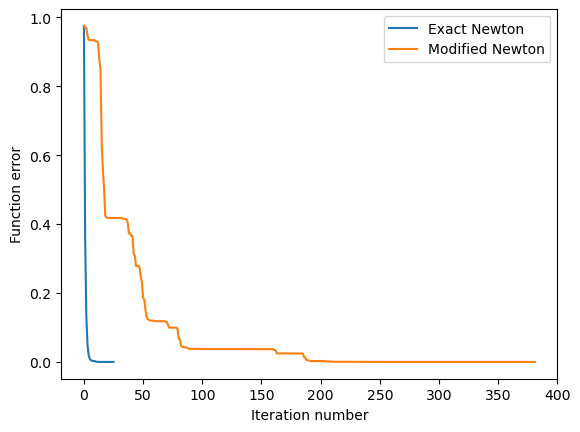

In [425]:
# Plot the function error vs. iteration number.
# Set the exact Newton method as the baseline.
plt.plot(range(len(f_exact_value_list)), f_exact_value_list - f_exact_value_list[-1], label="Exact Newton")
plt.plot(range(len(f_value_list)), f_value_list - f_exact_value_list[-1], label="Modified Newton")
plt.xlabel("Iteration number")
plt.ylabel("Function error")
plt.legend()
plt.savefig("./figure/hw4-9-32.png")
plt.show()